In [224]:
from datetime import datetime, date
import talib as ta
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from scipy import stats
import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.losses
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns


Remember to run the above code as well to enable the imports.

Run the notebook below, enter the stock ticker symbol in the console that appears and press enter.

In [225]:
stock = input("Enter a stock ticker.")
userDate = input("Enter a starting date.")

data = web.DataReader(stock, data_source = "yahoo", start = userDate, end = date.today())
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,265.299988,256.790009,258.359985,264.730011,1064700.0,237.968109
2019-01-03,264.000000,257.380005,262.320007,258.079987,1165600.0,231.990326
2019-01-04,265.489990,260.339996,261.920013,265.040009,1443800.0,238.246780
2019-01-07,270.000000,263.859985,266.000000,268.079987,1465200.0,240.979431
2019-01-08,271.750000,267.809998,271.130005,269.869995,1791400.0,242.588531
...,...,...,...,...,...,...
2022-11-28,485.239990,480.000000,480.109985,483.209991,939000.0,480.215485
2022-11-29,485.100006,481.739990,483.100006,484.100006,802600.0,481.100006
2022-11-30,485.950012,477.730011,480.000000,485.190002,1469100.0,485.190002


Basic Chart & Preferred Indicator

Indicators Avaiable:

RSI
EMA
SMA
MACD
VWAP

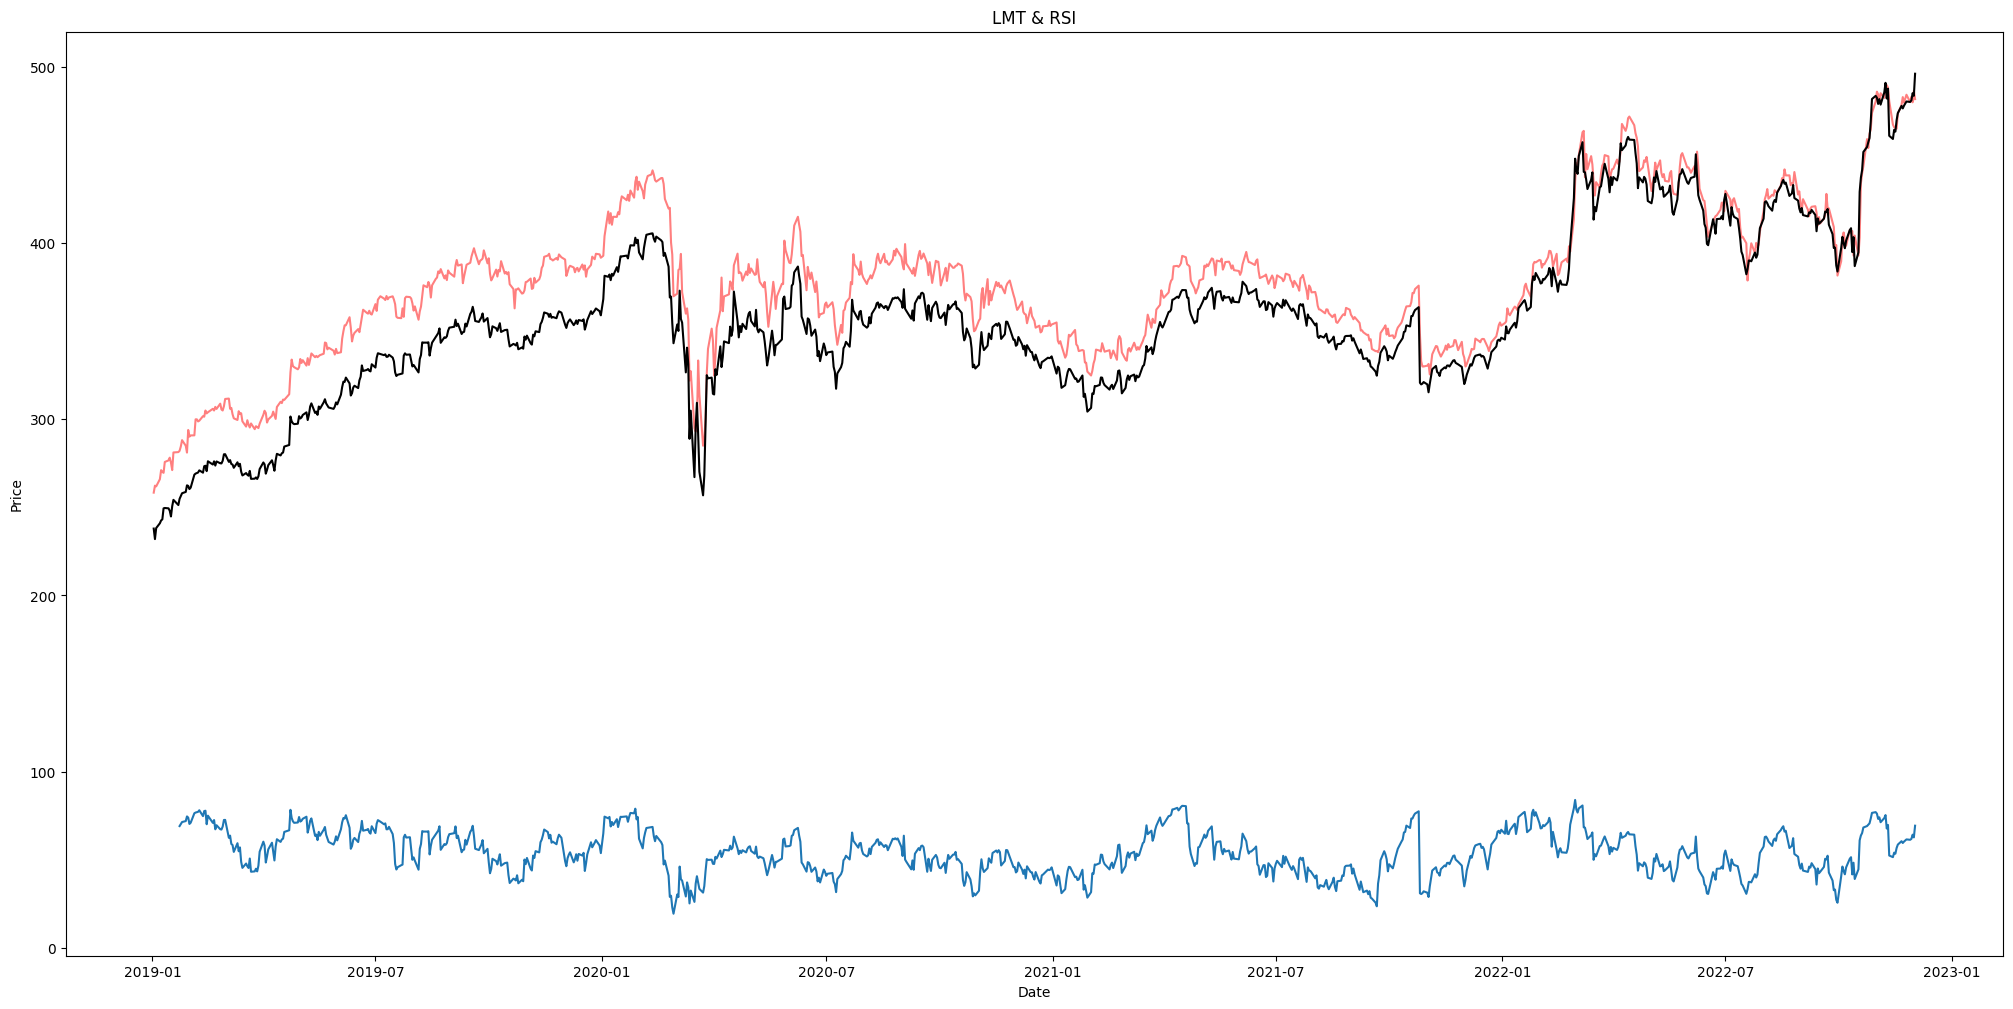

In [233]:
indicator = (input("Enter your preferred indicator."))

indicatortype = ""

#RSI
data['RSI'] = ta.RSI(data['Adj Close'], 14)

#EMA
data['EMA_50'] = ta.EMA(data['Adj Close'], 50)

#SMA_100
data['SMA_100'] = ta.SMA(data['Adj Close'], 100)

#MACD

#VWAP


def displaychart():
    plt.figure(figsize = (25, 12))
    plt.title(stock + " & " + indicator), 
    plt.xlabel('Date'),
    plt.ylabel('Price'),
    
    final_indicatortype = indicatortype[0].replace("", '')
    plt.plot(data[str(final_indicatortype)])
    plt.plot(data['Open'], color = 'red', alpha = 0.5)
    plt.plot(data['Adj Close'], color = 'black')
    plt.show()
    
    
if indicator == 'RSI':
    
    indicatortype = "RSI",
    displaychart()
    
if indicator == 'EMA':
    
    indicatortype = "EMA_50",
    displaychart()
      
if indicator == 'SMA':
    
    indicatortype = "SMA_100",
    displaychart()
    
if indicator == 'MACD':
    
    indicatortype = "MACD"
    displaychart()
    
if indicator == 'VWAP':
    
    indicatortype = "VWAP"
    displaychart()
    

In [228]:
#Correlation
print(".Corr values of " + stock)
data.corr()

.Corr values of LMT


,High,Low,Open,Close,Volume,Adj Close,RSI,EMA_50,SMA_100
High,1.000000,0.994343,0.995718,0.996460,0.015399,0.979742,0.158272,0.859534,0.642505
Low,0.994343,1.000000,0.996399,0.995838,-0.048181,0.977052,0.179226,0.841801,0.617302
Open,0.995718,0.996399,1.000000,0.992307,-0.017859,0.974644,0.150995,0.852774,0.630578
Close,0.996460,0.995838,0.992307,1.000000,-0.014120,0.981944,0.187172,0.849002,0.628521
Volume,0.015399,-0.048181,-0.017859,-0.014120,1.000000,0.028244,-0.083234,0.024881,-0.014799
Adj Close,0.979742,0.977052,0.974644,0.981944,0.028244,1.000000,0.122840,0.906205,0.729871
RSI,0.158272,0.179226,0.150995,0.187172,-0.083234,0.122840,1.000000,-0.139262,-0.224082
EMA_50,0.859534,0.841801,0.852774,0.849002,0.024881,0.906205,-0.139262,1.000000,0.924873
SMA_100,0.642505,0.617302,0.630578,0.628521,-0.014799,0.729871,-0.224082,0.924873,1.000000


Linear Regression Based Prediction

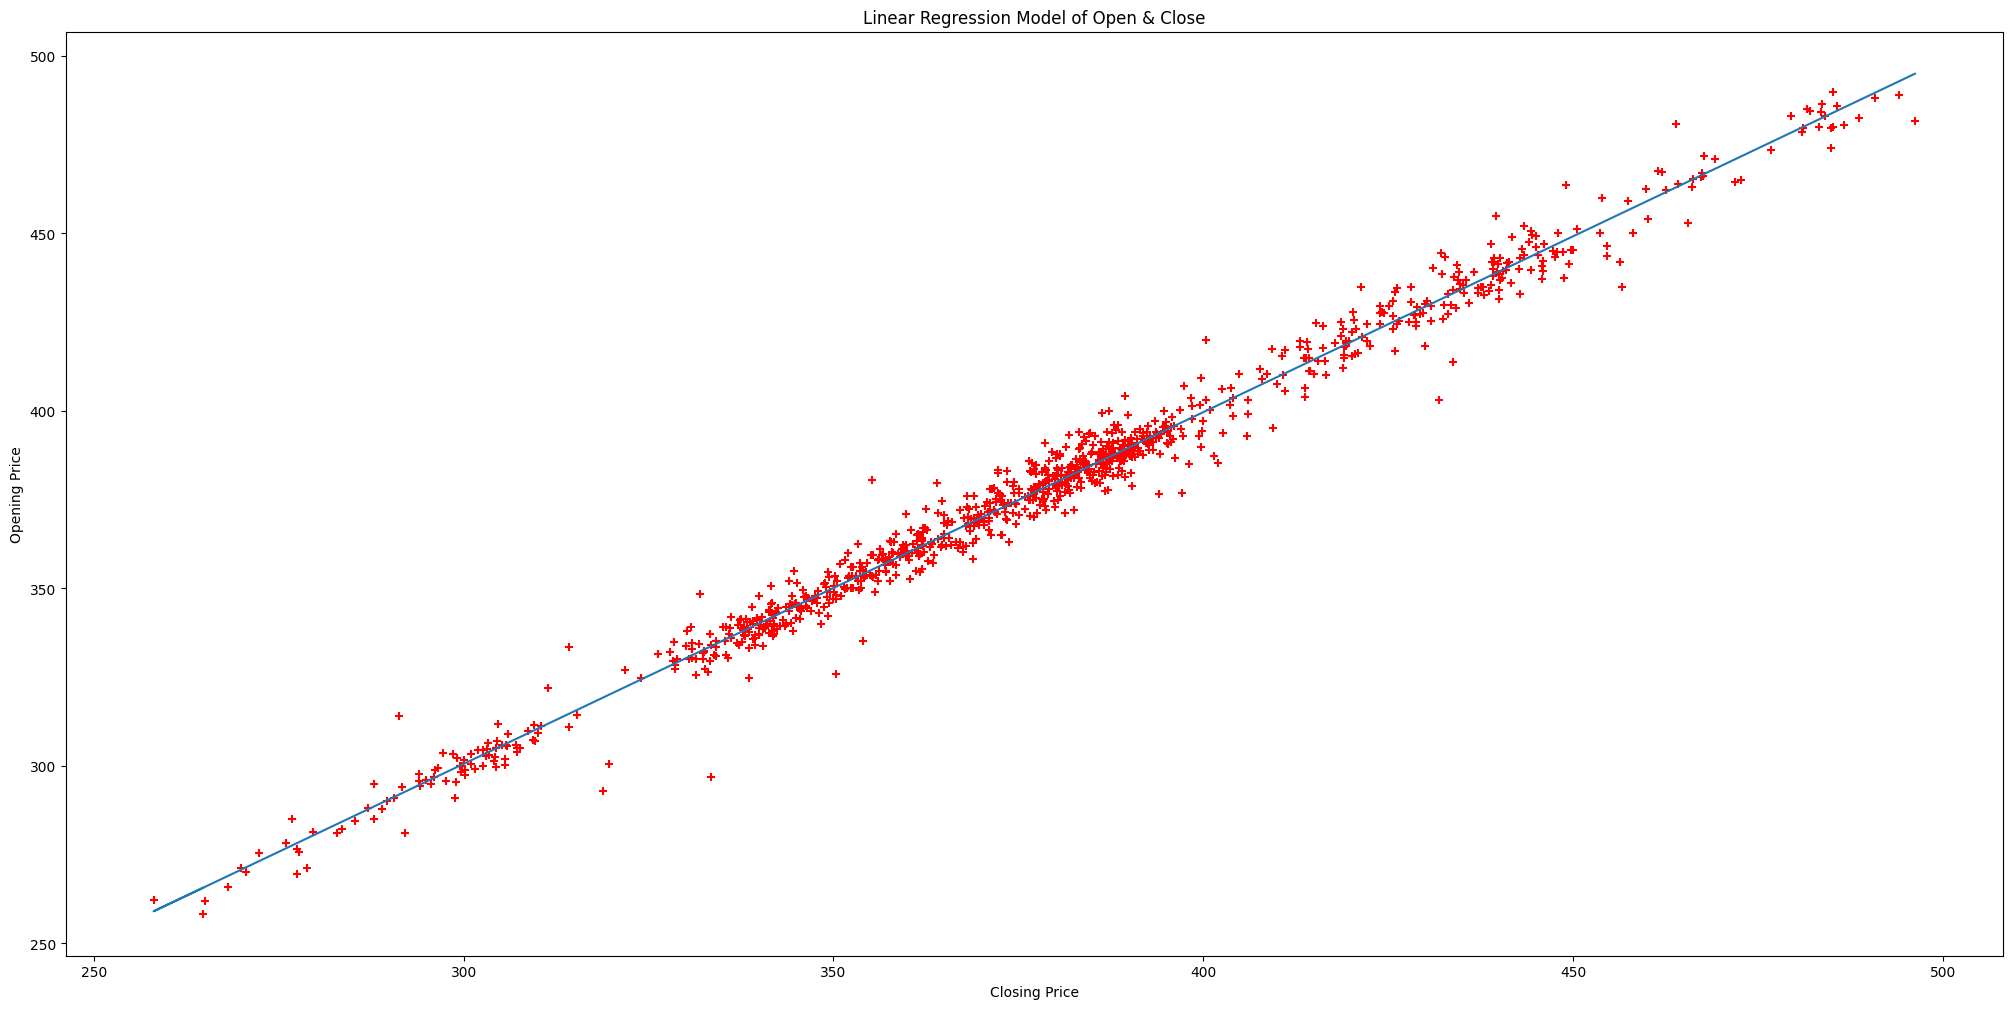

In [229]:
#linear regression of stock open & close
x = data.Close
y = data.Open

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, x))

plt.figure(figsize = (25, 12))
plt.title('Linear Regression Model of Open & Close')
plt.xlabel('Closing Price')
plt.ylabel('Opening Price')

plt.scatter(x, y, color = 'red', marker ='+')
plt.plot(x, model)
plt.show()


In [230]:
#calculating relationship
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.9923074387522124


In [231]:
#prediction of what the open (y) price will be according to the last closing (x) price.

slope, intercept, r, p, std_err = stats.linregress(x, y)

def mypredict(x):
    return slope * x + intercept

prediction = myfunc(data.Close[-1])

print("Predicted Next Day Opening Price:")
print(prediction)

print("Previous Closing Price:")
print(data.Close[-1])

Predicted Next Day Opening Price
494.9958503128387
Previous Closing Price:
496.2300109863281
